### 学籍番号
202421695

### 氏名
松本寛智


In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:

try:
    red_table = pd.read_csv("winequality-red.table")
    white_table = pd.read_csv("winequality-white.table")
except:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    red_table = pd.read_table(url, delimiter=";")
    red_table.to_csv("winequality-red.table")
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
    white_table = pd.read_table(url, delimiter=";")
    white_table.to_csv("winequality-white.table")

In [ ]:
red_table

## 1.重回帰
University of California Irvine では“Machine Learning Repository”という機械学習のベ ンチマークデータセットを公開している.そのサイトにある“Wine Quality Data Set”(類 似名のデータがあるので注意)を用いる.


## (1) 
白ワイン，赤ワインそれぞれについて，11 種類すべての特徴量を説明変数とした 1 次 式による品質指標の回帰分析を通じて，品質と関連のある特徴量を調査しなさい.結果 を元に白ワインと赤ワインではどのような相違があるか考察しなさい

In [9]:
red_table.columns = red_table.columns.str.replace(" ","")
features = '+'.join(red_table.columns.difference(['quality']))
formula = f'quality ~ {features}'
results_red = smf.ols(formula=formula,data=red_table).fit()
print(results_red.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          1.79e-145
Time:                        22:29:31   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.9652     21

## 赤ワイン
どの特定の説明変数も目的変数へ影響を与える。  
また、説明変数が目的変数へ影響を与える。


In [11]:
white_table.columns = white_table.columns.str.replace(" ","")
features = '+'.join(white_table.columns.difference(['quality']))
formula = f'quality ~ {features}'
results_white = smf.ols(formula=formula,data=white_table).fit()
print(results_white.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:32:47   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            150.1928     18

## 白ワイン
説明変数(chlorides,citricacid)ha,目的変数へ影響を与えると断定する根拠が乏しい.  
一方で、前述の説明変数でない説明変数は目的変数へ影響を与える。  
説明変数が目的変数へ影響を与える。

## 考察
1. R-squared値の比較
赤ワインのR-squaredは0.361で、回帰モデルが36.1%の品質のばらつきを説明している。  
白ワインのR-squaredは0.282で、モデルが28.2%の品質のばらつきを説明している。  
赤ワインの方が品質を説明する精度が高いため、赤ワインの品質を予測する際には、今回のモデルが白ワインよりも適している可能性がある。

2. 有意性（P値）と各特徴量の影響  
白ワインでは"ph"や"density"は99%の信頼区間でも棄却できる。一方で、赤ワインではそれらは99％の信頼区間では棄却できない。
これは、赤ワインと白ワインで重視される味か違うからと考えられる。例えば、赤ワインは渋みを白ワインでは酸味が重視される。

3. 説明変数の重要度(coef)
赤ワインと白ワインでは、alcoholやsulphatesなどの影響の強さに差がある。特にdenstiyやchloridesの影響に関しては、赤ワインのほうが品質に与える影響が大きく、白ワインは他の要素（pHやdensity）の影響が顕著である。
それぞれの成分が品質に与える影響の大きさや方向性に違いがあり、これはおそらく赤ワインと白ワインの製造過程や化学的特性の違いによると考えられる。


## (2) 
特徴量どうしの積(クロスターム)も用いた 2 次式で回帰した場合には，回帰の質は改善するか評価しなさい.

In [12]:
# クロスタームを組み込む
interaction_terms = [f'{col1}:{col2}' for col1 in red_table.columns if col1 != 'quality' for col2 in red_table.columns if col2 != 'quality' and col1 < col2]
features_with_interactions = '+'.join(red_table.columns.difference(['quality']) ) + '+' + '+'.join(interaction_terms)
formula_with_interactions = f'quality ~ {features_with_interactions}'

# モデルをフィット
results_with_interactions = smf.ols(formula=formula_with_interactions, data=red_table).fit()

# 結果を表示
print(results_with_interactions.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     17.21
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          6.08e-140
Time:                        23:02:01   Log-Likelihood:                -1483.1
No. Observations:                1599   AIC:                             3100.
Df Residuals:                    1532   BIC:                             3461.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [13]:
# クロスタームを組み込む
interaction_terms = [f'{col1}:{col2}' for col1 in white_table.columns if col1 != 'quality' for col2 in red_table.columns if col2 != 'quality' and col1 < col2]
features_with_interactions = '+'.join(white_table.columns.difference(['quality']) ) + '+' + '+'.join(interaction_terms)
formula_with_interactions = f'quality ~ {features_with_interactions}'

# モデルをフィット
results_with_interactions = smf.ols(formula=formula_with_interactions, data=white_table).fit()

# 結果を表示
print(results_with_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     40.26
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:04:07   Log-Likelihood:                -5281.4
No. Observations:                4898   AIC:                         1.070e+04
Df Residuals:                    4831   BIC:                         1.113e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## 考察
1. R-squared値の比較
赤ワインのR-squaredは0.361→0.426でモデルは改善している。
白ワインのR-squaredは0.282→0.355改善している。
赤ワインの方が品質を説明する精度が高いため、赤ワインの品質を予測する際には、今回のモデルが白ワインよりも適している可能性がある。

2. 有意性（P値）と各特徴量の影響  
赤ワイン
クロスタームを追加することで、追加前より多くの特定の説明変数が目的変数への影響を与えると断定する根拠が乏しくなった。

白ワイン
クロスタームを追加することで、特定の説明変数でも説明変数全体でも目的変数への影響を与えると断定する根拠が乏しいものが多くなった。  
特定の説明変数が目的変数へ影響を与えると断定する根拠が乏しい.   
説明変数が目的変数へ影響を与えると断定する根拠が乏しい.  

## 2.分散分析
演習動画でも用いた solder データセットについて，動画では使用していない要因「Solder」， 「PadType」，「Panel」について3元配置の分散分析を実施し，要因の失敗回数への影響を 考察せよ

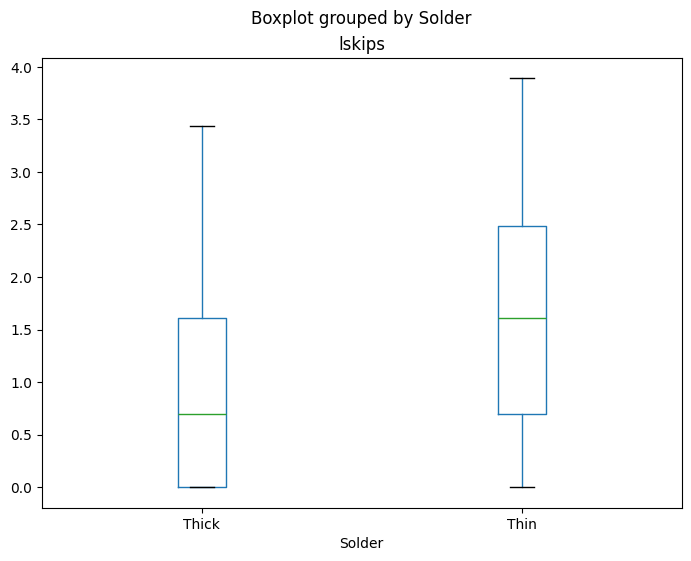

In [18]:
import matplotlib.pyplot as plt
data = sm.datasets.get_rdataset("solder", "survival", cache=True).data
data['lskips'] = np.log(1 + data['skips'])
# ボックスプロット
fig, ax = plt.subplots(figsize=(8, 6))
fig = data.boxplot("lskips", "Solder", ax=ax, grid=False)

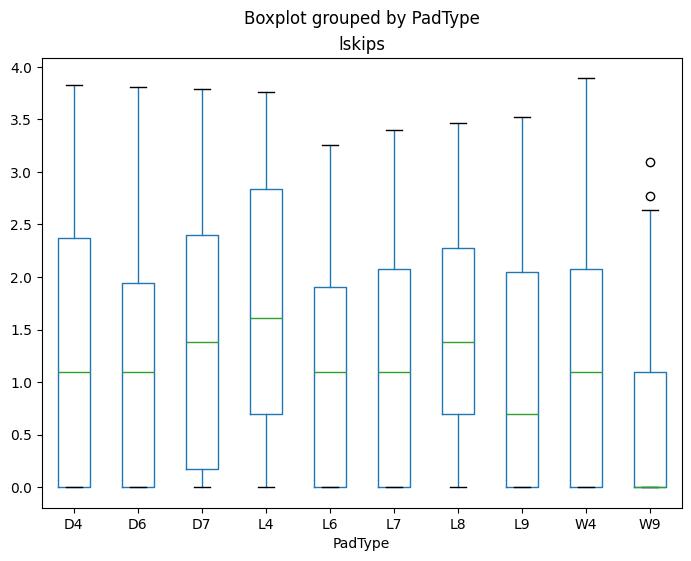

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = data.boxplot("lskips", "PadType", ax=ax, grid=False)

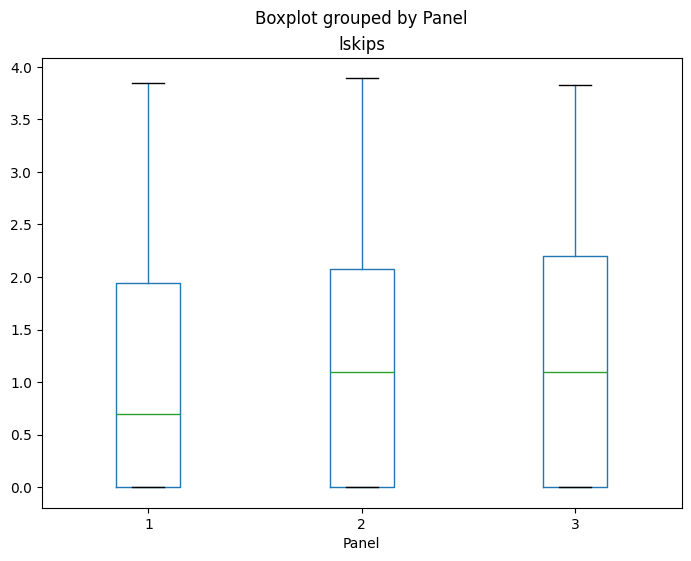

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = data.boxplot("lskips", "Panel", ax=ax, grid=False)

In [19]:
data.head(5)

,Opening,Solder,Mask,PadType,Panel,skips,lskips
0,L,Thick,A1.5,W4,1,0,0.0
1,L,Thick,A1.5,W4,2,0,0.0
2,L,Thick,A1.5,W4,3,0,0.0
3,L,Thick,A1.5,D4,1,0,0.0
4,L,Thick,A1.5,D4,2,0,0.0


In [20]:
data_lm = smf.ols("np.log(1+skips) ~ C(Solder) * C(PadType) * Panel", data=data).fit()
sm.stats.anova_lm(data_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Solder),1.0,137.213292,137.213292,136.686554,2.074928e-29
C(PadType),9.0,72.850132,8.094459,8.063386,1.556097e-11
C(Solder):C(PadType),9.0,12.517154,1.390795,1.385456,1.901469e-01
Panel,1.0,8.394015,8.394015,8.361792,3.928503e-03
C(Solder):Panel,1.0,5.782327,5.782327,5.760130,1.660556e-02
C(PadType):Panel,9.0,4.364981,0.484998,0.483136,8.865417e-01
C(Solder):C(PadType):Panel,9.0,1.822856,0.202540,0.201762,9.939883e-01
Residual,860.0,863.314115,1.003854,NaN,NaN


## 考察
 
特定の目的変数("Solder,PadType","PadType,Panel")が説明変数へ影響を与えると断定する根拠が乏しい.  
目的変数が説明変数へ影響を与えると断定する根拠が乏しい.  
